In [6]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('train.csv')
# 타이타닉 탑승자 정보 데이터셋 불러오기
df.shape
# 로우, 컬럼 갯수

(891, 12)

In [8]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 컬럼 확인

In [9]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#Survived - 생존 여부 (0 = 사망, 1 = 생존)
#Pclass - 티켓 클래스 (1 = 1등석, 2 = 2등석, 3 = 3등석)
#SibSp - 함께 탑승한 자녀 / 배우자 의 수
#Parch - 함께 탑승한 부모님 / 아이들 의 수
#Ticket - 티켓 번호
#Fare - 탑승 요금
#Cabin - 수하물 번호
#Embarked - 선착장 (C = Cherbourg, Q = Queenstown, S = Southampton)

### 결측치 확인

In [10]:
df.isnull().sum()
# 컬럼별 결측치 갯수

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df['Age'].median()
# 전체 나이 중앙값 파악
# 결측치 처리를 위해서

28.0

In [12]:
age = df['Age'].fillna(28)
age
# 결측치가 가장 많은 Age 컬럼의 결측치를 중앙값인 28로 채움
#### 성별로 구분하여 중앙 값을 잡는게 좀 더 정확하지 않을까?

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

### 성별 라벨 처리

In [13]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df.head(10)
# 성별을 라벨로 표기하여 전처리 / male - 1, female - 0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [14]:
f = df[df['Sex']==0]['Age'].median()
f
# 여자 나이의 중앙 값

27.0

In [15]:
m = df[df['Sex']==1]['Age'].median()
m
# 남자 나이의 중앙 값

29.0

In [16]:
df[df['Sex']==1].fillna(m)
# 남자인데 나이가 NaN값이면 남자 나이 중앙 값(m)으로 채워라

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,29,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,29,S
5,6,0,3,"Moran, Mr. James",1,29.0,0,0,330877,8.4583,29,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,29,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",1,28.0,0,0,C.A./SOTON 34068,10.5000,29,S
884,885,0,3,"Sutehall, Mr. Henry Jr",1,25.0,0,0,SOTON/OQ 392076,7.0500,29,S
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,29,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [17]:
df[df['Sex']==0].fillna(f)
# 여자인데 나이가 NaN값이면 여자 나이 중앙 값(f)으로 채워라

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,27,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,27,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,27,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",0,25.0,0,1,230433,26.0000,27,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",0,22.0,0,0,7552,10.5167,27,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,382652,29.1250,27,Q
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S


### 결측값 전처리 완료

In [18]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Cabin'].fillna('N',inplace=True)
df['Embarked'].fillna('N',inplace=True)
# 나이 결측 값은 중앙 값으로 채우고, 캐빈과 엠밬의 결측 값은 N으로 채움

In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 수하물 번호 머릿글자로 정리

In [20]:
df['Cabin'] = df['Cabin'].str[:1]
df['Cabin']
# 수하물 번호는 머릿글자로 정리

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

### 생존자 수 확인

In [21]:
df.groupby(['Sex','Survived'])[['Survived']].count()
# 성별로 확인, 0-여자, 1-남자 / 0-사망, 1-생존

Survived
Sex Survived          
0   0               81
    1              233
1   0              468
    1              109

### 성별 생존자수 바 차트

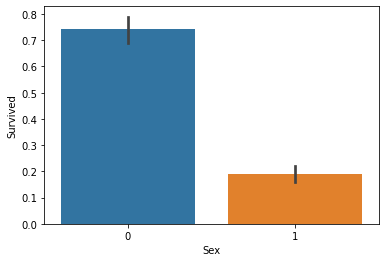

In [22]:
sns.barplot(x='Sex', y='Survived', data=df)

seaborn은 barplot() 함수를 사용할 때 각 막대에 기본적으로 오차막대(error bar)가 함께 나타나도록 되어 있다.
그리고 이 오차막대를 그리는 범위는 기본적으로 ‘부트 스트랩 신뢰구간(Bootstrap confidence interval)’이라는 것을 사용한다.
“이 데이터를 기반으로 유사한 상황의 95%가 이 범위 내에서 결과를 얻을 것”을 의미한다.
이 신뢰 구간은 평균(mean) 외에도 중앙값(median), 최빈값(mode) 등의 다른 값들을 함께 고려해서 계산하는 것이기 때문에 꽤나 훌륭한 수치라고 봐도 된다.
만약 이 오차막대에 신뢰구간이 아니라 표준편차를 표현하고 싶다면 sns.barplot() 안에 ci="sd"라고 지정하면 된다.

### 객실 등급별, 성별 생존자수

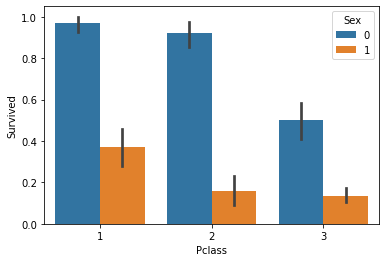

In [23]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
#남자보다 여자가 더 많이 생존했으며 남자는 1등실이 2,3등실 보다 더 생존했고, 여자는 1,2등실이 3등실보다 더 생존함

### 연령 별 생존자 수

In [24]:
def f1(age):
    f = ''
    if age <= 1: f='unknown'
    elif age <= 5: f='baby'
    elif age <= 12: f='child'
    elif age <= 18: f='teen'
    elif age <= 25: f='student'
    elif age <= 35: f='adult'
    elif age <= 60: f='senior'
    else: f = 'silver'
    return f

In [25]:
n = ['unknown', 'baby', 'child', 'teen', 'student', 'adult', 'senior', 'silver']

No handles with labels found to put in legend.


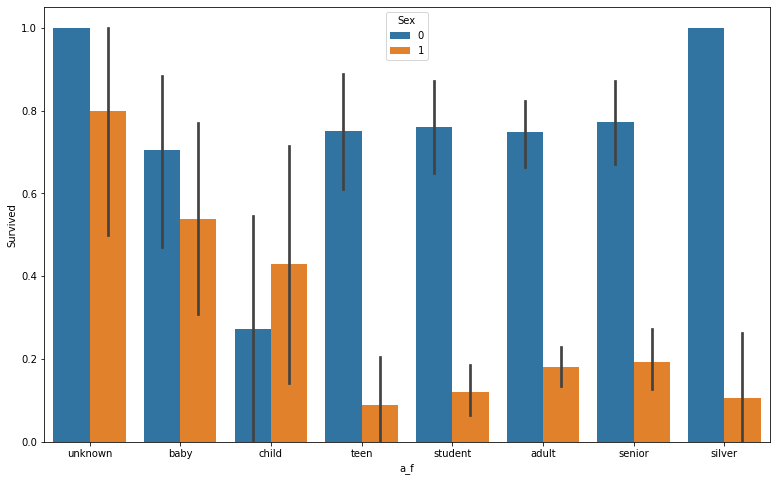

In [26]:
plt.figure(figsize=(13,8))
plt.legend(loc='best')
df['a_f'] = df['Age'].apply(lambda x : f1(x))
sns.barplot(x='a_f', y='Survived', hue='Sex', data=df, order=n)
df.drop('a_f', axis=1, inplace=True)

In [27]:
from sklearn import preprocessing

In [28]:
def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

df = encode_features(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [29]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

In [30]:
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

In [31]:
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [33]:
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [34]:
df = pd.read_csv('train.csv')
y_df = df['Survived']
X_df = df.drop('Survived', axis=1)
X_df = transform_features(X_df)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_df, y_df,
                                                  test_size=0.2, random_state=11)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [75]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4%}'.format(accuracy_score(y_test, dt_pred)))

rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4%}'.format(accuracy_score(y_test, rf_pred)))

lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4%}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 78.7709%
RandomForestClassifier 정확도:85.4749%
LogisticRegression 정확도: 84.9162%


C:\Users\BIT_R45\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
from sklearn.model_selection import KFold

In [80]:
def exec_kfold(clf, folds=5):
    #폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_df.values[train_index], X_df.values[test_index]
        y_train, y_test = y_df.values[train_index], y_df.values[test_index]
                # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4%}".format(iter_count, accuracy))
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4%}".format(mean_score))
# exec_kfold 호출
exec_kfold(dt_clf , folds=5)

교차 검증 0 정확도: 75.4190%
교차 검증 1 정확도: 78.0899%
교차 검증 2 정확도: 78.6517%
교차 검증 3 정확도: 76.9663%
교차 검증 4 정확도: 82.0225%
평균 정확도: 78.2299%


In [82]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_df , y_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4%}".format(iter_count, accuracy))

print("평균 정확도: {0:.4%}".format(np.mean(scores)))

교차 검증 0 정확도: 74.3017%
교차 검증 1 정확도: 77.5281%
교차 검증 2 정확도: 79.2135%
교차 검증 3 정확도: 78.6517%
교차 검증 4 정확도: 84.2697%
평균 정확도: 78.7929%


In [85]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4%}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 셋 DecisionTreeClassifier 정확도 : {0:.4%}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 79.9183%
테스트 셋 DecisionTreeClassifier 정확도 : 87.1508%
